# Linear Regression

In [10]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load dataset
diabetes = load_diabetes()

# Convert to DataFrame for easier manipulation
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # type: ignore
y = pd.Series(diabetes.target, name='target') # type: ignore

# Quick look
print(X.head())
print(y.head())

# Shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
Shape of X: (442, 10)
Shape of y: (442,)


age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179

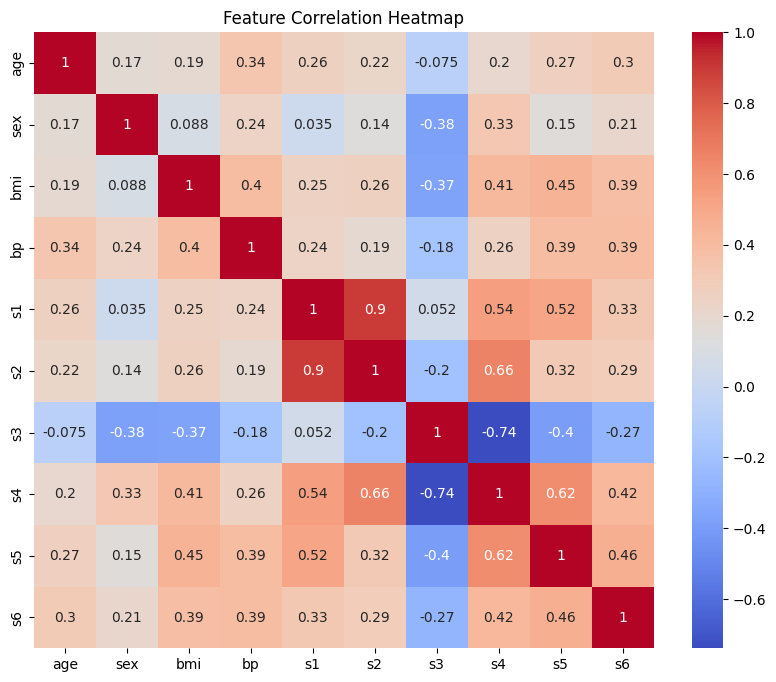

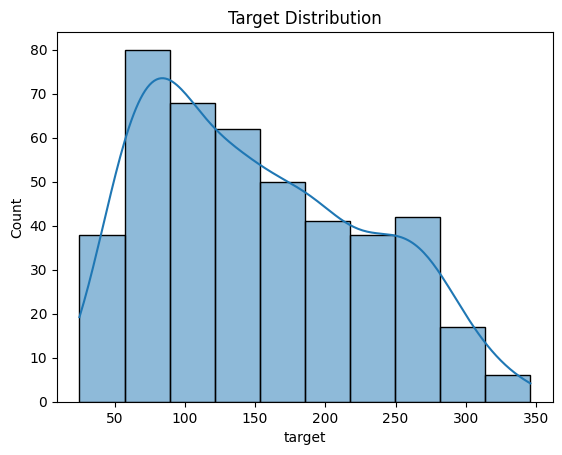

In [ ]:
# Check for missing values
print(X.isnull().sum())

# Summary statistics
print(X.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Target distribution
sns.histplot(y, kde=True) # type: ignore
plt.title("Target Distribution")
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# Define pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [15]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated R2 score
cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='r2')
print("Cross-validated R2 scores:", cv_r2)
print("Mean CV R2 Score:", np.mean(cv_r2))


Cross-validated R2 scores: [0.47012548 0.53681453 0.41108328 0.49128859 0.49251084]
Mean CV R2 Score: 0.4803645434411372


In [16]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [17]:
y_pred = pipeline.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R2 Score: {r2:.2f}")


Test MSE: 2900.19
Test R2 Score: 0.45


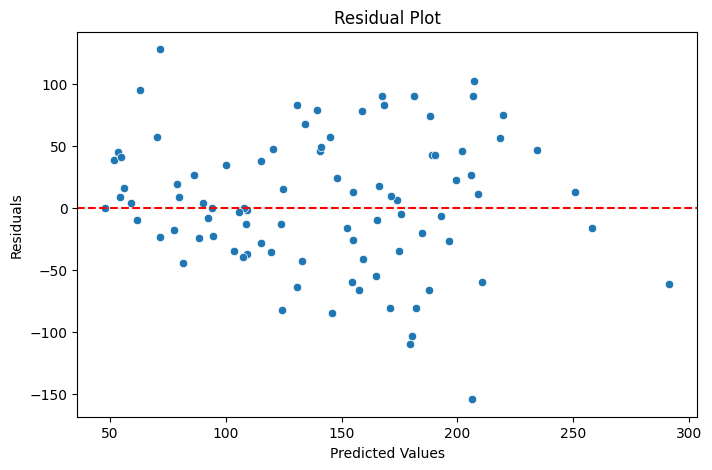

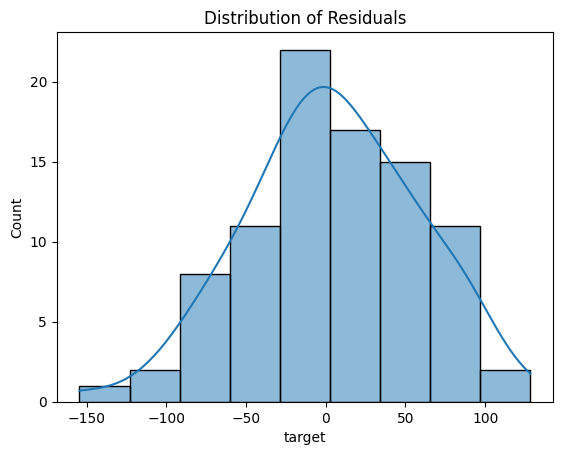

In [ ]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals) # type: ignore
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


# 📊 Linear Regression Report

- Used sklearn's diabetes dataset
- Data standardized using StandardScaler inside a Pipeline
- Cross-validated (5-fold) mean R2 score on train data: approx 0.47
- Test MSE: ~2900
- Test R2 score: ~0.45
- Residuals roughly centered around zero with mild heteroscedasticity
- Next steps: Try Ridge/Lasso, experiment with RobustScaler if outliers found


In [ ]:
# ml_utils.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score


def plot_correlation_heatmap(df):
    """Plots correlation heatmap."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()


def plot_target_distribution(target):
    """Plots target variable distribution."""
    sns.histplot(target, kde=True)
    plt.title("Target Distribution")
    plt.show()


def evaluate_regression(y_true, y_pred):
    """Returns MSE and R² for given predictions."""
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2


def plot_residuals(y_true, y_pred):
    """Plots residual scatter and distribution."""
    residuals = y_true - y_pred

    # Scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

    # Distribution
    sns.histplot(residuals, kde=True)
    plt.title("Residual Distribution")
    plt.show()


def cross_validate_model(pipeline, X, y, cv_splits=5):
    """Performs cross-validation and returns R² scores."""
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
    return scores


In [ ]:
# regressor_pipeline.py

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# import ml_utils as mu


class RegressionPipeline:
    def __init__(self, model=None):
        self.model = model if model else LinearRegression()
        self.pipeline = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('model', self.model)
        ])
        self.X_train, self.X_test = None, None
        self.y_train, self.y_test = None, None

    def split_data(self, X, y, test_size=0.2):
        """Splits data into train and test sets."""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )

    def train(self):
        """Fits the pipeline on training data."""
        self.pipeline.fit(self.X_train, self.y_train)

    def evaluate(self):
        """Evaluates on test data."""
        y_pred = self.pipeline.predict(self.X_test)
        mse, r2 = mu.evaluate_regression(self.y_test, y_pred)
        print(f"Test MSE: {mse:.2f}")
        print(f"Test R2 Score: {r2:.2f}")
        mu.plot_residuals(self.y_test, y_pred)

    def cross_validate(self, cv_splits=5):
        """Performs cross-validation."""
        scores = mu.cross_validate_model(
            self.pipeline, self.X_train, self.y_train, cv_splits=cv_splits)
        print("Cross-validated R2 scores:", scores)
        print("Mean CV R2 Score:", np.mean(scores))
